In [1]:
# To predict the pro of nopt fully paid

In [30]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

# Read and check the data

In [31]:
loa=pd.read_csv('loan_data.csv')
loa.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [6]:
loa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [7]:
loa.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


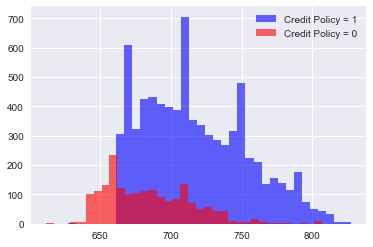

In [33]:
loa[loa['credit.policy']==1]['fico'].hist(bins=35, color='blue', label='Credit Policy = 1', alpha=0.6)
loa[loa['credit.policy']==0]['fico'].hist(bins=35, color='red', label='Credit Policy = 0', alpha=0.6)

plt.legend()
plt.xlabel('FICO')

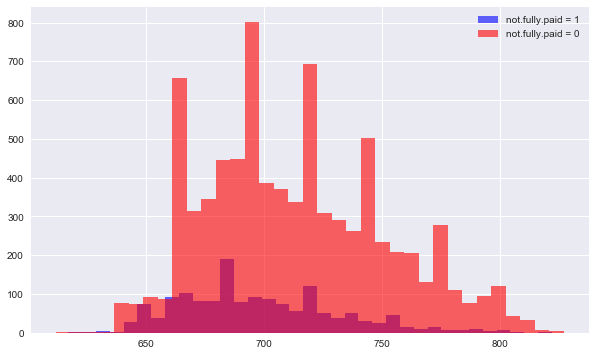

In [36]:
plt.figure(figsize=(10,6))
loa[loa['not.fully.paid']==1]['fico'].hist(bins=35, color='blue', label='not.fully.paid = 1', alpha=0.6)
loa[loa['not.fully.paid']==0]['fico'].hist(bins=35, color='red', label='not.fully.paid = 0', alpha=0.6)

plt.legend()

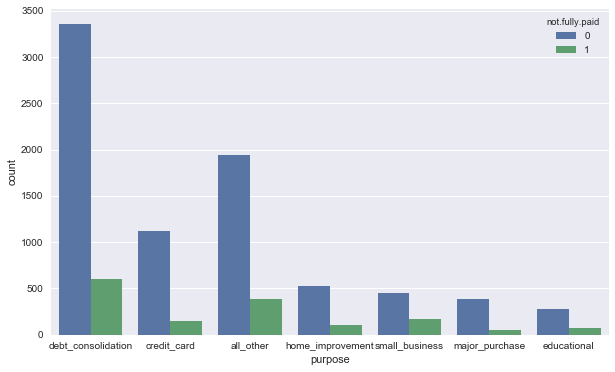

In [39]:
plt.figure(figsize=(10,6))
sb.countplot(x='purpose', hue='not.fully.paid', data=loa)

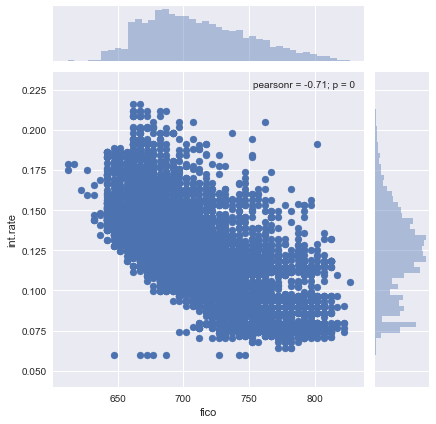

In [42]:
sb.jointplot(x='fico', y='int.rate', data=loa)
# make sense, score lower=higher interest rate

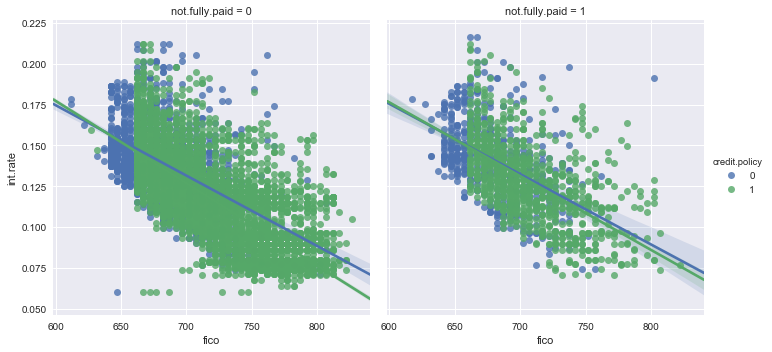

In [47]:
sb.lmplot(x='fico', y='int.rate', data=loa, hue='credit.policy', col='not.fully.paid')

In [48]:
loa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [50]:
#  notice that purpose column as categorical
pd.get_dummies(loa['purpose'])

,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
5,0,1,0,0,0,0,0
6,0,0,1,0,0,0,0
7,1,0,0,0,0,0,0
8,0,0,0,0,1,0,0
9,0,0,1,0,0,0,0


In [51]:
fd=pd.get_dummies(loa, columns=['purpose'], drop_first=True)

In [52]:
fd.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


# train test split

In [83]:
from sklearn.model_selection import train_test_split
X=fd.drop('not.fully.paid', axis=1)
y=fd['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# decision tree model

In [91]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [92]:
predictions=dtree.predict(X_test)

In [93]:
from sklearn.metrics import classification_report as cr, confusion_matrix as cm
print(cm(y_test, predictions))
print(cr(y_test, predictions))

[[1991  440]
 [ 341  102]]
             precision    recall  f1-score   support

          0       0.85      0.82      0.84      2431
          1       0.19      0.23      0.21       443

avg / total       0.75      0.73      0.74      2874



# random forest model

In [111]:
from sklearn.ensemble import RandomForestClassifier 
rfc=RandomForestClassifier(n_estimators=300)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [112]:
predictions2=rfc.predict(X_test)

In [113]:
print(cm(y_test, predictions2))
print(cr(y_test, predictions2))

[[2420   11]
 [ 436    7]]
             precision    recall  f1-score   support

          0       0.85      1.00      0.92      2431
          1       0.39      0.02      0.03       443

avg / total       0.78      0.84      0.78      2874



In [ ]:
# overall, the random forest model did better, did a lot worse on some particular spots